# Introduction to FEniCS

# What is (and isn't) FEnICS?

An open-source Python/C++ library for solving ODEs and PDEs using finite elements
* Very high level
* Parallelised
* Well maintained, lots of documentation, large user community

FEniCS is **not** a GUI-based program with pre-defined models like COMSOL or Abaqus

# Example 1 - Poisson's equation

Poisson's equation shows up in a huge range of applications, so let's look
at how it can be solved in FEniCS

Specifically, let's solve
\begin{align}
\nabla^2 u + f = 0 \quad &\text{in $\Omega$} \\
u = 0 \quad &\text{on $\partial \Omega$}
\end{align}

For simplicity, let's take $\Omega$ to be the unit square

# FEniCS Code

In [27]:
from fenics import *

N = 20
mesh = UnitSquareMesh(N, N)

P1 = FiniteElement('CG', 'triangle', 1)
Vh = FunctionSpace(mesh, P1)

u = Function(Vh)
v = TestFunction(Vh)

def boundaries(x):
    return near(x[0], 0) or near(x[0], 1) or near(x[1], 0) or near(x[1], 1)

bc = DirichletBC(Vh, 0.0, boundaries)

f = 1.0
F = -dot(grad(u), grad(v)) * dx + f * v * dx

solve(F == 0, u, bc)

# Looking into the code

The FEniCS packages are imported using the command

In [3]:
from fenics import *

This provides access to libraries for...
* Defining the weak form, differential operators, and mathematical functions (UFL)
* Generating low-level C++ code from UFL code (FFC, UFC)
* Mesh generation, assembly of discretised problem, numerical linear algebra (dolfin)

# Mesh generation

The mesh for the unit square is generated by the code

In [4]:
N = 20
mesh = UnitSquareMesh(N, N)

$N$ represents the number of elements in each direction

The mesh can be visualised using the `plot` function:

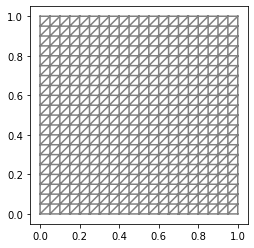

In [5]:
plot(mesh)

# Defining the elements

* We need to define the elements that will be used to construct the solution
* We'll use P1 elements (continuous polynomials of order 1 on triangles)

In [13]:
P1 = FiniteElement('CG', 'triangle', 1)

# Defining the discrete function space

Now we create the function space that contains the basis functions on the mesh

In [8]:
Vh = FunctionSpace(mesh, P1)

This function space is used to create the solution $u$ and test function $v$:

In [9]:
u = Function(Vh)
v = TestFunction(Vh)

# Defining Dirichlet boundary conditions

Typically done in two steps:
1. Specifying the boundaries where a Dirichlet condition is to be imposed
2. Specifying the value of the solution at these boundaries


In our case, we do these two steps using the code

In [10]:
def boundaries(x):
    return near(x[0], 0) or near(x[0], 1) or near(x[1], 0) or near(x[1], 1)

bc = DirichletBC(Vh, 0.0, boundaries)

A Python function `boundaries` is used to define the boundary $\partial \Omega$

`DirichletBC` is used to specify that functions in $V_h$ take the value of 0.0 on $\partial \Omega$

The boundary conditions are stored a variable called `bc` - this will be passed to the solver (which is when they are imposed)

# Defining the PDE via the weak form

Recall that the weak form is given by

\begin{align}
\underbrace{-\int_{\Omega} \nabla u \cdot \nabla v\, dx + \int_{\Omega} f v\, dx}_F = 0 \quad \text{for all $v \in V_h$}
\end{align}

The weak form is coded up very naturally (the key benefit of FEniCS)

In [11]:
f = 1.0
F = -dot(grad(u), grad(v)) * dx + f * v * dx

The quantity `dx` represents integration over the domain $\Omega$ defined by the mesh

# Solving the problem

We can now solve the problem by simply calling

In [12]:
solve(F == 0, u, bc)

* This uses a Newton-like method to solve the problem $F(u) = 0$
* Jacobian automatically computed!
* The boundary conditions are passed as the third argument